# Remote work data analysis project

###  Importing modules

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import math
from statsmodels.stats.proportion import proportion_confint
import statsmodels.stats.weightstats as smwt
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import levene, f_oneway


### Loading dataset

In [2]:
df = pd.read_csv("remote.csv")
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [3]:
df.shape

(5000, 20)

In [4]:
df.size 

100000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [6]:
df.duplicated().sum()

np.int64(0)

## Handling Missing Values in dataset 

### As we can see two Columns (Physical_Activity and Mental_Health_Condition) are having missing values

- First Approach : Remove Rows with Missing Values (If Data Loss is Acceptable) If the missing data is small (e.g., <5% of total entries) and random

- Second Approach : Impute Missing Values For Categorical Data (e.g., Mental_Health_Condition, Physical_Activity): Mode Imputation (Fill with Most Frequent Category)

- Third Approach : Create a "Missing" Category (For Categorical Data) If missing values might hold meaning (e.g., employees did not report their mental health condition), create a new category

- Forth Approach : 4. Predict Missing Values Using Machine Learning (Advanced Approach) If missing values depend on other factors, you can predict them using models like KNN or Decision Trees.

In [8]:
df['Mental_Health_Condition'].fillna(df['Mental_Health_Condition'].mode()[0], inplace=True)
df['Physical_Activity'].fillna(df['Physical_Activity'].mode()[0], inplace=True)

In [9]:
print(df.isnull().sum())


Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64


In [10]:
print(df['Mental_Health_Condition'].mode()[0])
print(df['Physical_Activity'].mode()[0])


Burnout
Weekly


## Summery Statistics 

In [11]:
# for numeric values 
print(df.describe().T)
# for categorical values
print(df.describe(include='object').T)

                                  count     mean        std   min   25%   50%  \
Age                              5000.0  40.9950  11.296021  22.0  31.0  41.0   
Years_of_Experience              5000.0  17.8102  10.020412   1.0   9.0  18.0   
Hours_Worked_Per_Week            5000.0  39.6146  11.860194  20.0  29.0  40.0   
Number_of_Virtual_Meetings       5000.0   7.5590   4.636121   0.0   4.0   8.0   
Work_Life_Balance_Rating         5000.0   2.9842   1.410513   1.0   2.0   3.0   
Social_Isolation_Rating          5000.0   2.9938   1.394615   1.0   2.0   3.0   
Company_Support_for_Remote_Work  5000.0   3.0078   1.399046   1.0   2.0   3.0   

                                  75%   max  
Age                              51.0  60.0  
Years_of_Experience              26.0  35.0  
Hours_Worked_Per_Week            50.0  60.0  
Number_of_Virtual_Meetings       12.0  15.0  
Work_Life_Balance_Rating          4.0   5.0  
Social_Isolation_Rating           4.0   5.0  
Company_Support_for_Remote_Wo

In [12]:
# Checking unique values in categorical columns

for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

Employee_ID: 5000 unique values
Gender: 4 unique values
Job_Role: 7 unique values
Industry: 7 unique values
Work_Location: 3 unique values
Stress_Level: 3 unique values
Mental_Health_Condition: 3 unique values
Access_to_Mental_Health_Resources: 2 unique values
Productivity_Change: 3 unique values
Satisfaction_with_Remote_Work: 3 unique values
Physical_Activity: 2 unique values
Sleep_Quality: 3 unique values
Region: 6 unique values


### Before we continue we dont need the employee id for any purpose so we drop it

In [13]:
df=df.drop(columns='Employee_ID',axis=1)

In [14]:
df.head()

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,Weekly,Poor,North America
3,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,Weekly,Poor,Europe
4,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,Burnout,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [15]:
df.duplicated().sum()

np.int64(0)

## Now let's perform Chi Squared test to find association between categorical variables

### The Chi-Squared test is used to determine if there is a significant association between two categorical variables. Based on your dataset, you can perform the test on variables that are categorical in nature. Here are some suitable pairs for the Chi-Squared test:

Possible Categorical Variable Pairs for Chi-Squared Test:
- Gender vs. Mental_Health_Condition – To check if mental health conditions are distributed differently among genders.

- Work_Location vs. Satisfaction_with_Remote_Work – To see if work location (Remote/Hybrid/Onsite) affects satisfaction with remote work.

- Access_to_Mental_Health_Resources vs. Mental_Health_Condition – To determine if having access to mental health resources impacts the presence of mental health conditions.

- Stress_Level vs. Productivity_Change – To examine whether different stress levels correlate with changes in productivity.

- Company_Support_for_Remote_Work vs. Satisfaction_with_Remote_Work – To check if company support affects employees' satisfaction with remote work.

- Region vs. Work_Life_Balance_Rating – To see if work-life balance varies across regions.


### What we Will Get from the Chi-Squared Test:
Chi-Squared Statistic (χ²) – Measures the degree of association between the two categorical variables.
p-value – Determines if the observed association is statistically significant. A p-value < 0.05 suggests a significant relationship.
Degrees of Freedom (df) – The number of independent comparisons being made.
Expected vs. Observed Frequencies – Helps understand how different the actual data is from what would be expected if there were no association.

### Conditions for the Chi-square Test
1. Independence: Each case that contributes a count to the table must be independent of all the other cases in the table.

2. Sample size: Each particular scenario (i.e. "cell") must have at least 5
expected cases.

3. df 1: Degrees of freedom must be at least 1.

In [16]:
# List of variable pairs for Chi-Squared tests
chi_squared_pairs = [
    ('Gender', 'Mental_Health_Condition'),
    ('Work_Location', 'Satisfaction_with_Remote_Work'),
    ('Access_to_Mental_Health_Resources', 'Mental_Health_Condition'),
    ('Stress_Level', 'Productivity_Change'),
    ('Company_Support_for_Remote_Work', 'Satisfaction_with_Remote_Work'),
    ('Region', 'Work_Life_Balance_Rating')
]

# Function to perform and display Chi-Squared test results
def perform_chi_squared_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"\n### {col1} vs. {col2} ###")
    print(f"Chi-Squared Statistic: {chi2_stat}")
    print(f"p-value: {p_val}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies Table:")
    print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

    print(f"\nH0: {col1} and {col2} are independent. {col1} does not affect {col2}.")
    print(f"H1: {col1} and {col2} are dependent. {col1} affects {col2}.\n")

    if p_val > 0.05:
        print(f"Since p-value is high, we fail to reject H0. The data do not provide convincing evidence that {col1} and {col2} are dependent.")
    else:
        print(f"Since p-value is low, we reject H0. The data provide convincing evidence that {col1} and {col2} are dependent.")

# Perform Chi-Squared tests for each pair
for col1, col2 in chi_squared_pairs:
    perform_chi_squared_test(df, col1, col2)


### Gender vs. Mental_Health_Condition ###
Chi-Squared Statistic: 6.935025958486911
p-value: 0.3268978145495503
Degrees of Freedom: 6
Expected Frequencies Table:
Mental_Health_Condition   Anxiety   Burnout  Depression
Gender                                                 
Female                   325.6344  630.8848    317.4808
Male                     324.6120  628.9040    316.4840
Non-binary               310.2984  601.1728    302.5288
Prefer not to say        317.4552  615.0384    309.5064

H0: Gender and Mental_Health_Condition are independent. Gender does not affect Mental_Health_Condition.
H1: Gender and Mental_Health_Condition are dependent. Gender affects Mental_Health_Condition.

Since p-value is high, we fail to reject H0. The data do not provide convincing evidence that Gender and Mental_Health_Condition are dependent.

### Work_Location vs. Satisfaction_with_Remote_Work ###
Chi-Squared Statistic: 14.488583346162601
p-value: 0.0058884019693480035
Degrees of Freedom: 4
Expec

### Summary of Results
- Gender vs. Mental Health Condition → No significant relationship (p = 0.327). Gender does not impact mental health conditions.

- Work Location vs. Satisfaction with Remote Work → Significant relationship (p = 0.006). Work location affects satisfaction with remote work.

- Access to Mental Health Resources vs. Mental Health Condition → No significant relationship (p = 0.217). Access to resources does not impact mental health conditions.

- Stress Level vs. Productivity Change → No significant relationship (p = 0.304). Stress level does not significantly affect productivity changes.

- Company Support for Remote Work vs. Satisfaction with Remote Work → No significant relationship (p = 0.262). Company support does not strongly impact satisfaction.

- Region vs. Work-Life Balance Rating → No significant relationship (p = 0.574). Work-life balance does not vary significantly by region.

Only Work Location vs. Satisfaction with Remote Work shows a significant relationship, meaning work location influences how satisfied employees are with remote work. All other relationships lack strong statistical evidence.









## Calculation of 95% Confidence Intervals for Key Work-Related Metrics

In [17]:

def confidence_interval(data, column_name):
    """Calculate the 95% confidence interval for the mean of a given column."""
    xbar = data[column_name].mean()  # Sample mean
    n = len(data[column_name])       # Sample size
    dg = n - 1                       # Degrees of freedom
    SExbar = data[column_name].std() / math.sqrt(n)  # Standard error of the mean

    # Calculate the t-value for the 95% confidence interval
    t_value = stats.t.ppf(1 - 0.05/2, df=dg)

    # Margin of error
    margin_of_error = t_value * SExbar

    # Confidence interval
    lower_bound = xbar - margin_of_error
    upper_bound = xbar + margin_of_error

    print(f"95% Confidence Interval for the mean of {column_name}: ({lower_bound:.2f}, {upper_bound:.2f})")

# Applying to multiple columns
columns = ["Age","Years_of_Experience", "Hours_Worked_Per_Week", "Number_of_Virtual_Meetings"]

for col in columns:
    confidence_interval(df, col)

95% Confidence Interval for the mean of Age: (40.68, 41.31)
95% Confidence Interval for the mean of Years_of_Experience: (17.53, 18.09)
95% Confidence Interval for the mean of Hours_Worked_Per_Week: (39.29, 39.94)
95% Confidence Interval for the mean of Number_of_Virtual_Meetings: (7.43, 7.69)


## Statistical Comparison of Employee Metrics Using Two-Sample <br>t-Tests

In [18]:
# Function to perform a two-sample t-test
def perform_ttest(group1, group2, label1, label2, variable):
    data1 = df[df[label1] == group1][variable].dropna()
    data2 = df[df[label2] == group2][variable].dropna()

    # Levene’s test for variance equality
    stat, p_var = stats.levene(data1, data2)
    equal_var = p_var > 0.05  # True if variances are similar

    # Perform Independent Two-Sample t-Test
    t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=equal_var)

    # Output results
    print(f"\nComparison: {variable} between {group1} and {group2}")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Reject H₀: Significant difference in {variable} between {group1} and {group2}.")
    else:
        print(f"Fail to reject H₀: No significant difference in {variable} between {group1} and {group2}.")

# useless comparisions just to show why we need anova test
# 1. Compare "Hours Worked Per Week" between Remote and Onsite employees  (hybrid work location missing)
perform_ttest("Remote", "Onsite", "Work_Location", "Work_Location", "Hours_Worked_Per_Week")

# 2. Compare "Number of Virtual Meetings" between employees with high and low Work-Life Balance Ratings (2,3,4 scale missing)
perform_ttest(5, 1, "Work_Life_Balance_Rating", "Work_Life_Balance_Rating", "Number_of_Virtual_Meetings")

# some usefull comparisions
# 1. Compare "Years of Experience" between Male and Female employees
perform_ttest("Male", "Female", "Gender", "Gender", "Years_of_Experience")

# 2. Compare "Years of Experience" between Male and Female employees
perform_ttest("Yes", "No", "Access_to_Mental_Health_Resources", "Access_to_Mental_Health_Resources", "Social_Isolation_Rating")



Comparison: Hours_Worked_Per_Week between Remote and Onsite
T-statistic: -0.9170, P-value: 0.3592
Fail to reject H₀: No significant difference in Hours_Worked_Per_Week between Remote and Onsite.

Comparison: Number_of_Virtual_Meetings between 5 and 1
T-statistic: 0.3834, P-value: 0.7015
Fail to reject H₀: No significant difference in Number_of_Virtual_Meetings between 5 and 1.

Comparison: Years_of_Experience between Male and Female
T-statistic: 0.2595, P-value: 0.7952
Fail to reject H₀: No significant difference in Years_of_Experience between Male and Female.

Comparison: Social_Isolation_Rating between Yes and No
T-statistic: 0.2874, P-value: 0.7738
Fail to reject H₀: No significant difference in Social_Isolation_Rating between Yes and No.


### I Know i know you its not 100% usefull as in two sample t-test we can only compare means of two groups what if three or more ? WE have anova!

# Comparing Several Means: Analysis of Variance - ANOVA F-test

### We're facing a limitation of the independent two-sample t-test, which is designed to compare only two groups at a time. However, if we want to compare more than two groups, the appropriate statistical test is one-way ANOVA (Analysis of Variance).

## Why Use One-Way ANOVA Instead of a T-Test?
- Handles Multiple Groups: Unlike the t-test, which only compares two groups, ANOVA can compare means across multiple categories.

- Reduces Type I Error: Performing multiple t-tests increases the chance of a false positive. ANOVA controls for this issue.

- Determines Overall Differences: If ANOVA finds a significant difference, we can perform post-hoc tests (like Tukey’s HSD) to see which specific groups differ.



Performing One-Way ANOVA for Age vs. Mental_Health_Condition

ANOVA Results:
                     Source             SS    DF          MS         F  \
0  Mental_Health_Condition      32.832221     2   16.416110  0.128608   
1                   Within  637840.042779  4997  127.644595       NaN   

      p-unc       np2  
0  0.879322  0.000051  
1       NaN       NaN  
The p-value (0.8793) is greater than 0.05, meaning there is no significant difference in Age across Mental_Health_Condition groups.

Plotting Residuals vs Fitted Values to check for homoscedasticity...

Plotting Residuals by Group to check for systematic patterns...

Generating Q-Q Plot to check normality of residuals...


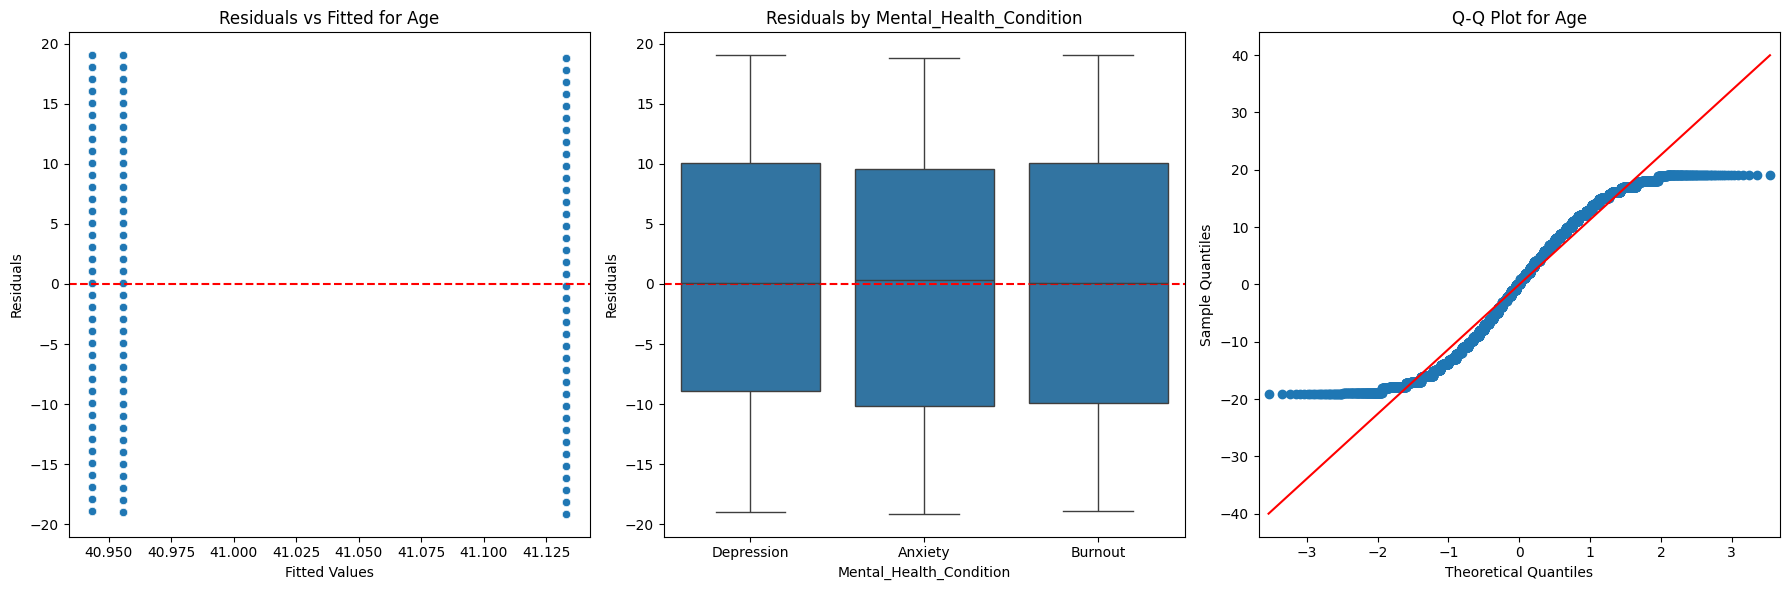


Checking Homogeneity of Variance using Brown-Forsythe Test...
Brown-Forsythe Test:
                W     pval  equal_var
levene  0.200033  0.81871       True
The p-value is greater than 0.05, indicating variance is equal across groups. ANOVA assumptions hold.

Performing Tukey's HSD Test for pairwise group comparisons...
Tukey's HSD Test:
          A           B    mean(A)    mean(B)      diff        se         T  \
0  Anxiety     Burnout  41.133020  40.943457  0.189563  0.389142  0.487132   
1  Anxiety  Depression  41.133020  40.955859  0.177162  0.449802  0.393866   
2  Burnout  Depression  40.943457  40.955859 -0.012402  0.392424 -0.031602   

    p-tukey      none  
0  0.877428  0.016731  
1  0.918055  0.015740  
2  0.999450 -0.001098  

Tukey's test helps identify which specific groups differ from each other. If p-values are below 0.05, those pairs have significant differences.

Performing One-Way ANOVA for Hours_Worked_Per_Week vs. Work_Location

ANOVA Results:
           Source

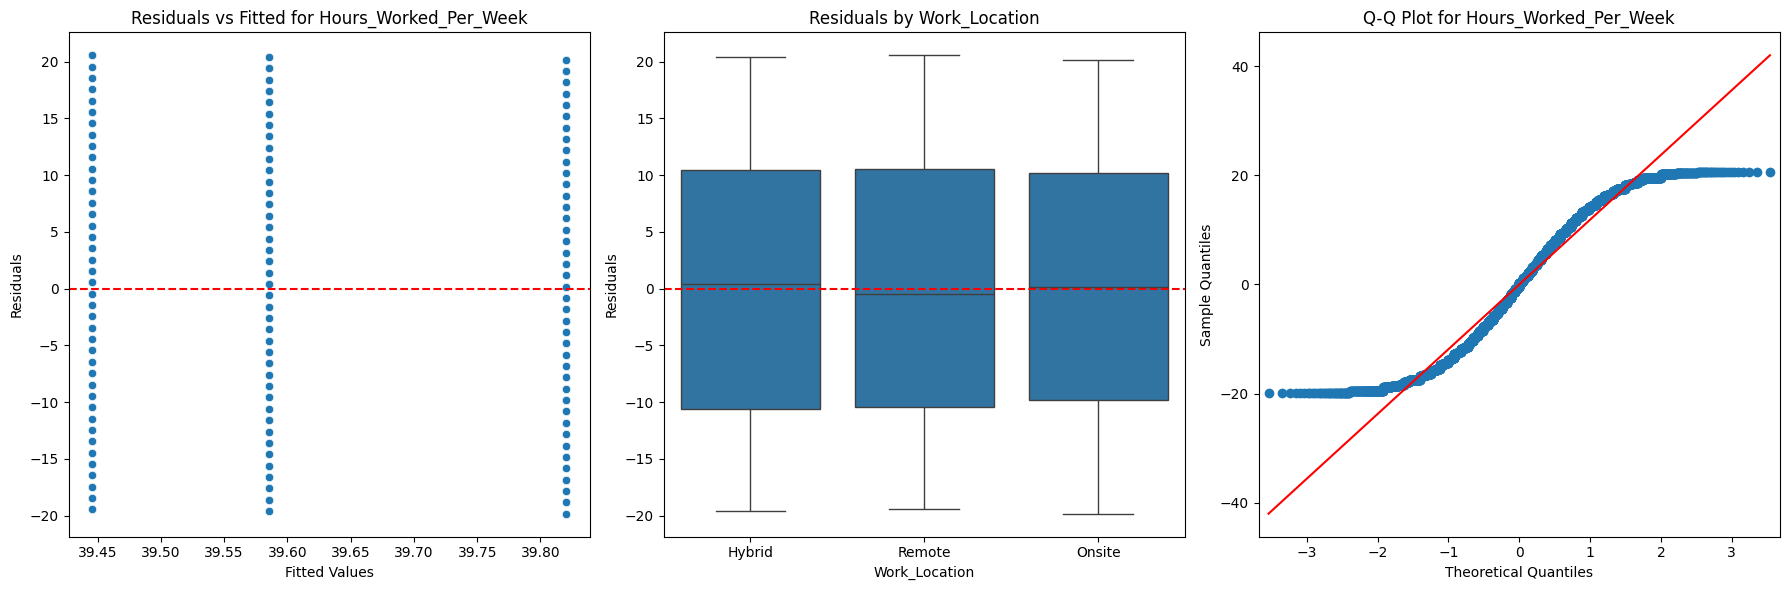


Checking Homogeneity of Variance using Brown-Forsythe Test...
Brown-Forsythe Test:
                W     pval  equal_var
levene  1.357455  0.25741       True
The p-value is greater than 0.05, indicating variance is equal across groups. ANOVA assumptions hold.

Performing Tukey's HSD Test for pairwise group comparisons...
Tukey's HSD Test:
         A       B    mean(A)    mean(B)      diff        se         T  \
0  Hybrid  Onsite  39.585810  39.820403 -0.234594  0.413848 -0.566859   
1  Hybrid  Remote  39.585810  39.445741  0.140069  0.409156  0.342335   
2  Onsite  Remote  39.820403  39.445741  0.374662  0.409920  0.913988   

    p-tukey      none  
0  0.837753 -0.019774  
1  0.937447  0.011772  
2  0.631461  0.031691  

Tukey's test helps identify which specific groups differ from each other. If p-values are below 0.05, those pairs have significant differences.

Performing One-Way ANOVA for Number_of_Virtual_Meetings vs. Work_Location

ANOVA Results:
           Source             SS

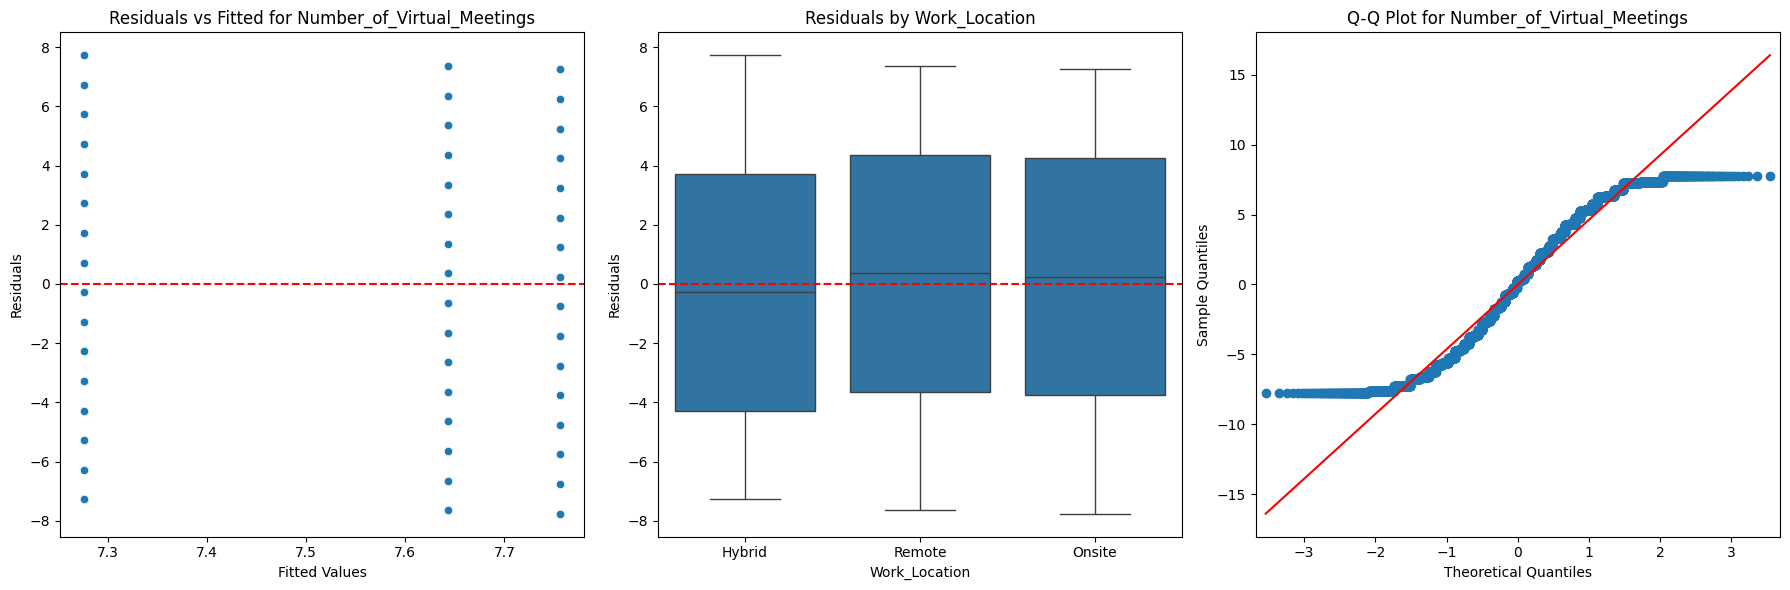


Checking Homogeneity of Variance using Brown-Forsythe Test...
Brown-Forsythe Test:
                W      pval  equal_var
levene  0.407347  0.665435       True
The p-value is greater than 0.05, indicating variance is equal across groups. ANOVA assumptions hold.

Performing Tukey's HSD Test for pairwise group comparisons...
Tukey's HSD Test:
         A       B   mean(A)   mean(B)      diff        se         T   p-tukey  \
0  Hybrid  Onsite  7.275925  7.756261 -0.480337  0.161629 -2.971841  0.008360   
1  Hybrid  Remote  7.275925  7.642940 -0.367016  0.159797 -2.296761  0.056334   
2  Onsite  Remote  7.756261  7.642940  0.113321  0.160095  0.707835  0.758869   

       none  
0 -0.103828  
1 -0.079005  
2  0.024498  

Tukey's test helps identify which specific groups differ from each other. If p-values are below 0.05, those pairs have significant differences.

Performing One-Way ANOVA for Years_of_Experience vs. Region

ANOVA Results:
    Source             SS    DF          MS         

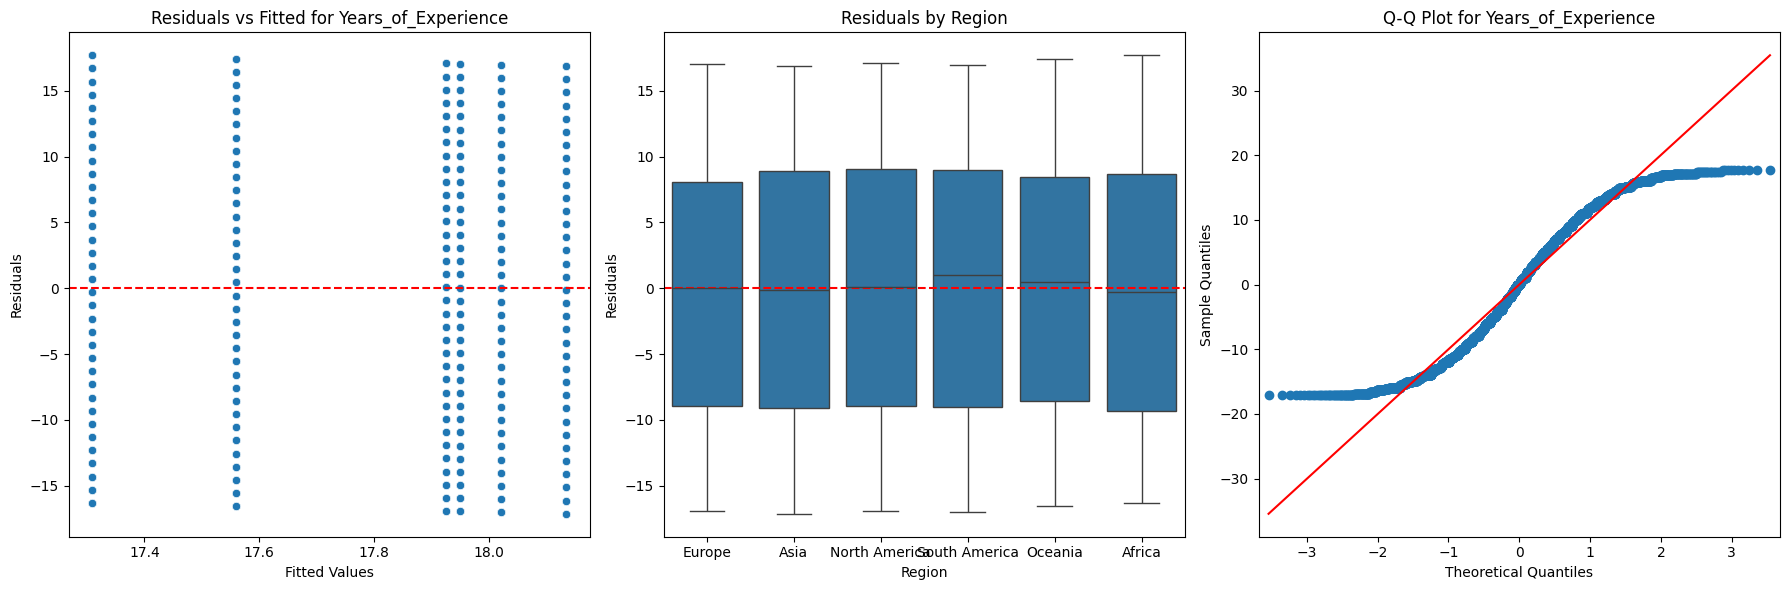


Checking Homogeneity of Variance using Brown-Forsythe Test...
Brown-Forsythe Test:
                W      pval  equal_var
levene  1.225704  0.294094       True
The p-value is greater than 0.05, indicating variance is equal across groups. ANOVA assumptions hold.

Performing Tukey's HSD Test for pairwise group comparisons...
Tukey's HSD Test:
                 A              B    mean(A)    mean(B)      diff        se  \
0          Africa           Asia  17.309302  18.133896 -0.824594  0.487764   
1          Africa         Europe  17.309302  17.948810 -0.639507  0.486135   
2          Africa  North America  17.309302  17.925354 -0.616052  0.496005   
3          Africa        Oceania  17.309302  17.559400 -0.250098  0.482290   
4          Africa  South America  17.309302  18.020556 -0.711254  0.488064   
5            Asia         Europe  18.133896  17.948810  0.185087  0.490605   
6            Asia  North America  18.133896  17.925354  0.208542  0.500387   
7            Asia        Oceani

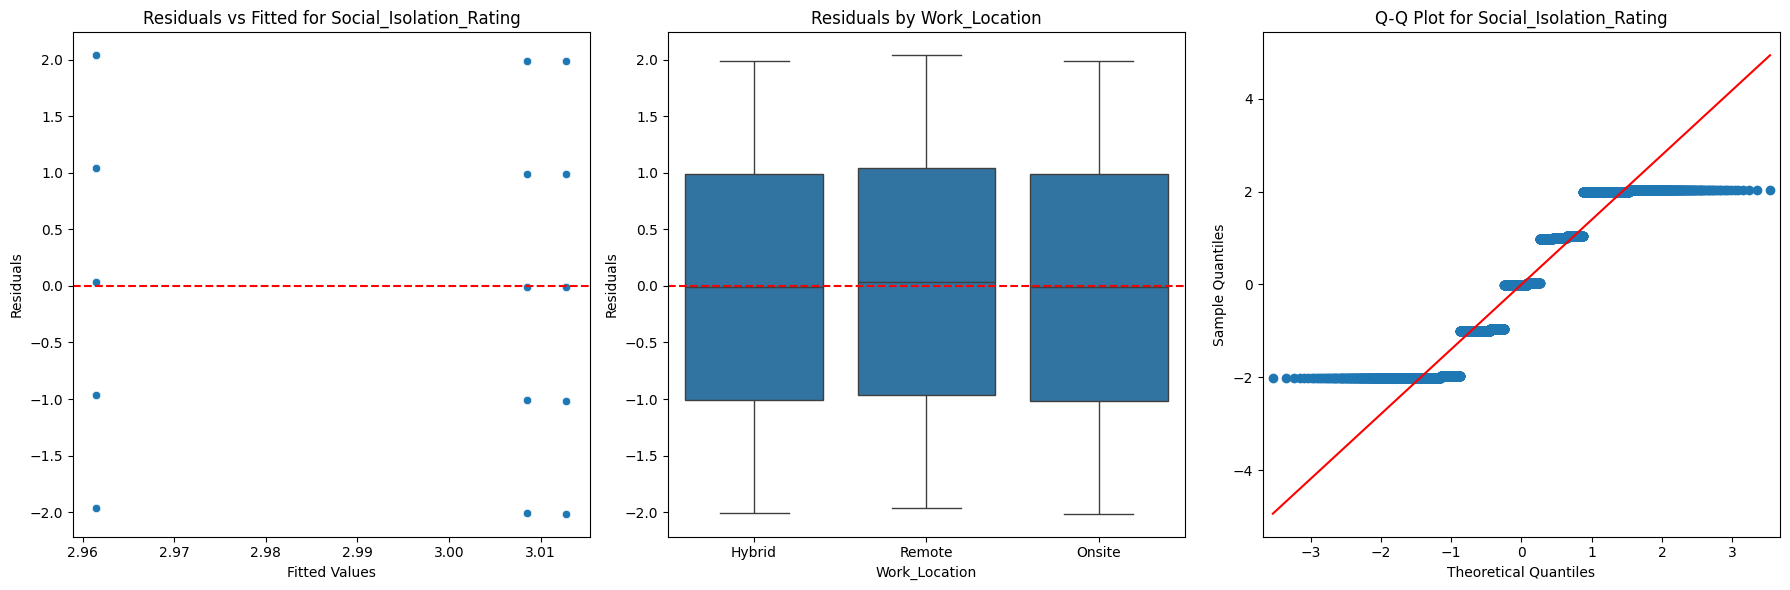


Checking Homogeneity of Variance using Brown-Forsythe Test...
Brown-Forsythe Test:
                W      pval  equal_var
levene  0.314229  0.730366       True
The p-value is greater than 0.05, indicating variance is equal across groups. ANOVA assumptions hold.

Performing Tukey's HSD Test for pairwise group comparisons...
Tukey's HSD Test:
         A       B   mean(A)   mean(B)      diff        se         T   p-tukey  \
0  Hybrid  Onsite  3.008490  3.012828 -0.004338  0.048661 -0.089155  0.995627   
1  Hybrid  Remote  3.008490  2.961494  0.046996  0.048109  0.976870  0.591546   
2  Onsite  Remote  3.012828  2.961494  0.051335  0.048199  1.065060  0.535880   

       none  
0 -0.003102  
1  0.033791  
2  0.036802  

Tukey's test helps identify which specific groups differ from each other. If p-values are below 0.05, those pairs have significant differences.


In [25]:
# Define comparisons
comparisons = {
    "Age": "Mental_Health_Condition",
    "Hours_Worked_Per_Week": "Mental_Health_Condition",
    "Hours_Worked_Per_Week": "Job_Role",
    "Hours_Worked_Per_Week": "Work_Location",
    "Number_of_Virtual_Meetings": "Work_Location",
    "Years_of_Experience": "Region",
    "Social_Isolation_Rating": "Physical_Activity",
    "Social_Isolation_Rating": "Work_Location"
}

for independent_var, dependent_var in comparisons.items():
    print(f"\nPerforming One-Way ANOVA for {independent_var} vs. {dependent_var}\n")
    
    # Perform ANOVA
    aov = pg.anova(dv=independent_var, between=dependent_var, data=df, detailed=True)
    print("ANOVA Results:\n", aov)
    
    # Interpretation of ANOVA results
    p_value = aov['p-unc'][0]
    if p_value < 0.05:
        print(f"The p-value ({p_value:.4f}) is less than 0.05, indicating a significant difference in {independent_var} among different {dependent_var} groups.")
    else:
        print(f"The p-value ({p_value:.4f}) is greater than 0.05, meaning there is no significant difference in {independent_var} across {dependent_var} groups.")
    
    # Residual Analysis
    model = ols(formula=f"{independent_var} ~ C({dependent_var})", data=df).fit()
    residuals = model.resid
    fitted_values = model.fittedvalues
    
    print("\nPlotting Residuals vs Fitted Values to check for homoscedasticity...")
    
    # Create subplots for all three graphs in one row
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Residuals vs Fitted Values
    sns.scatterplot(x=fitted_values, y=residuals, ax=axes[0])
    axes[0].axhline(y=0, color='r', linestyle='--')
    axes[0].set_xlabel("Fitted Values")
    axes[0].set_ylabel("Residuals")
    axes[0].set_title(f"Residuals vs Fitted for {independent_var}")
    
    print("\nPlotting Residuals by Group to check for systematic patterns...")
    # Residuals by Group
    sns.boxplot(x=df[dependent_var], y=residuals, ax=axes[1])
    axes[1].axhline(y=0, color='r', linestyle='--')
    axes[1].set_xlabel(dependent_var)
    axes[1].set_ylabel("Residuals")
    axes[1].set_title(f"Residuals by {dependent_var}")
    
    print("\nGenerating Q-Q Plot to check normality of residuals...")
    # Q-Q Plot
    sm.qqplot(residuals, line='s', ax=axes[2])
    axes[2].set_title(f"Q-Q Plot for {independent_var}")
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
    
    # Brown-Forsythe Test for Homogeneity of Variance
    print("\nChecking Homogeneity of Variance using Brown-Forsythe Test...")
    homo_test = pg.homoscedasticity(df, dv=independent_var, group=dependent_var)
    print("Brown-Forsythe Test:\n", homo_test)
    
    if homo_test["pval"].values[0] < 0.05:
        print("The p-value is less than 0.05, indicating variance is not equal across groups. Performing Kruskal-Wallis test instead of ANOVA.")
        kruskal_test = pg.kruskal(data=df, dv=independent_var, between=dependent_var)
        print("\nKruskal-Wallis Test:\n", kruskal_test)
    else:
        print("The p-value is greater than 0.05, indicating variance is equal across groups. ANOVA assumptions hold.")
    
    # Tukey's HSD Test for multiple comparisons
    print("\nPerforming Tukey's HSD Test for pairwise group comparisons...")
    tukey = pg.pairwise_tukey(data=df, dv=independent_var, between=dependent_var, effsize='none')
    print("Tukey's HSD Test:\n", tukey)
    
    print("\nTukey's test helps identify which specific groups differ from each other. If p-values are below 0.05, those pairs have significant differences.")


## Summary of One-Way ANOVA Results
### Age vs. Mental Health Condition:

- ANOVA Results: p-value = 0.8793, indicating no significant difference in age across different mental health conditions.

- Assumptions: The residuals are homoscedastic and follow a normal distribution.

- Tukey’s HSD: No significant pairwise differences between mental health conditions (all p-values > 0.05).

### Hours Worked per Week vs. Job Role:

- ANOVA Results: p-value = 0.2380, meaning no significant difference in hours worked across job roles.

- Assumptions: Residuals meet the homoscedasticity and normality requirements.

- Tukey’s HSD: No significant differences between job roles (all p-values > 0.05).

### Number of Virtual Meetings vs. Work Location:

- ANOVA Results: p-value = 0.0079, indicating a significant difference in virtual meetings across work locations.
- Assumptions: Homogeneity of variance holds.
- Tukey’s HSD: Significant difference between Hybrid and Onsite locations (p-value = 0.008), but no significant differences for other comparisons.

### Years of Experience vs. Region:

- ANOVA Results: p-value = 0.5233, meaning no significant difference in years of experience across regions.

- Assumptions: The assumptions are satisfied with equal variances and normal residuals.

- Tukey’s HSD: No significant differences between regions (all p-values > 0.05).

### Social Isolation Rating vs. Physical Activity:

- ANOVA Results: p-value = 0.1238, indicating no significant difference in social isolation ratings based on physical activity.

- Assumptions: Homogeneity of variance holds, and the residuals are normally distributed.

- Tukey’s HSD: No significant differences between daily and weekly activity groups (p-value = 0.1238).

### Key Insights:
#### Significant Findings: Only the number of virtual meetings showed a significant difference across work locations (Hybrid vs. Onsite).
#### Non-Significant Findings: No significant differences were found for Age, Job Role, Years of Experience, or Social Isolation Rating based on the tested factors.
- This analysis helps guide future decisions or interventions based on the data's relationships.